In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import plotly.express as px


In [79]:
DATA_PATH = '../1. Data/'
WASTE_PATH = DATA_PATH+'waste.csv'
plt.rcParams['figure.figsize'] = (15, 10)

df = pd.read_csv('../1. Data/waste.csv', delimiter=';', decimal='.')
df['date'] = pd.to_datetime(df['date'])  # convert date column to datetime format
df.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual_1,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006


In [80]:
df.measure_type = df.measure_type.apply(lambda type: "manual" if type != "automatic" else type)
df.head()

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
0,411.0,Extra toppings,Prepared-Edible Exc.,Barcelona,B,Article,automatic,2022-08-13 21:00:00,13.906042
1,332.0,Meat,Prepared-Edible Exc.,Barcelona,B,Ingredient,automatic,2022-12-10 20:00:00,11.592153
2,874.0,"Potato, Grains & Pasta",Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-06-03 21:00:00,26.351053
3,508.0,Sandwich,Prepared-Edible Exc.,Madrid,B,Article,manual,2021-07-02 21:00:00,23.008216
4,345.0,Fruit & Vegetables,Prepared-Expired,Barcelona,B,Ingredient,automatic,2021-10-21 11:00:00,18.286006


In [81]:
df.sort_values('date', ascending=True).head()


,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
15931,1087.0,Main Course,Inventory Spoilage,Madrid,B,Article,manual,2021-02-02 08:00:00,20.429831
24053,602.0,Desserts & Pastries,Prepared-Expired,Madrid,B,Article,automatic,2021-02-05 18:00:00,39.030475
32292,115.0,Desserts & Pastries,Inventory Spoilage,Madrid,B,Ingredient,manual,2021-02-05 18:00:00,15.949232
48779,447.0,Fish & Seafood,No Reason Provided,Barcelona,B,Article,manual,2021-02-06 19:00:00,109.564492
22479,914.0,Extra toppings,Prepared-Expired,Madrid,B,Ingredient,manual,2021-02-07 11:00:00,10.410475


In [82]:
def multiplot_col(df, column, measure_column):
    fig, axes = plt.subplots(nrows=len(df[column].unique()), ncols=1,  sharex=True, sharey=True)
    plt.subplots_adjust(top=2)

    for i, item in enumerate(df[column].unique()):
        temp_df = df[df[column] == item]
        temp_df[measure_column].plot(ax=axes[i])
        axes[i].set_title(item)

def plot_bars(df, cat_column, measure_column):
    heights = [df[df[cat_column] == cat].waste.sum() for cat in df[cat_column].unique()]
    plt.bar(x=df[cat_column].unique(), height=heights)

def plot_mixture_kde(df, cat_column, measure_column):
    for cat in df[cat_column].unique():
        temp_df = df[df[cat_column] == cat]
        sns.kdeplot(data=temp_df, x="waste", label=cat)
    plt.legend(loc='upper right')


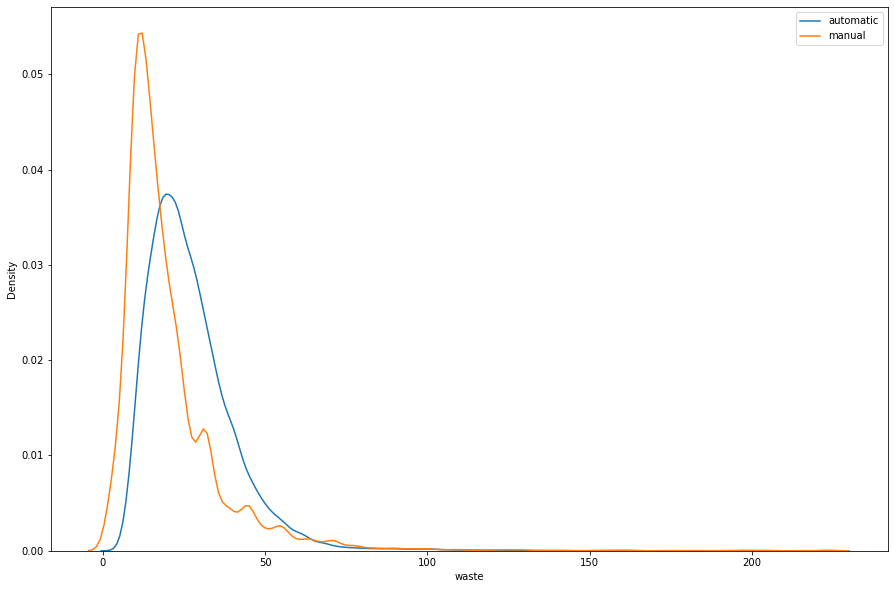

In [83]:
plot_mixture_kde(df, "measure_type", "waste")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Bread'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Dairy & Eggs'),
  Text(4, 0, 'Desserts & Pastries'),
  Text(5, 0, 'Extra toppings'),
  Text(6, 0, 'Fish & Seafood'),
  Text(7, 0, 'Fruit & Vegetables'),
  Text(8, 0, 'Main Course'),
  Text(9, 0, 'Meat'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Potato, Grains & Pasta'),
  Text(12, 0, 'Sandwich'),
  Text(13, 0, 'Sauces, Jams & Condiments'),
  Text(14, 0, 'Snacks'),
  Text(15, 0, 'Soup'),
  Text(16, 0, 'Vegetables'),
  Text(17, 0, 'Vegetarian')])

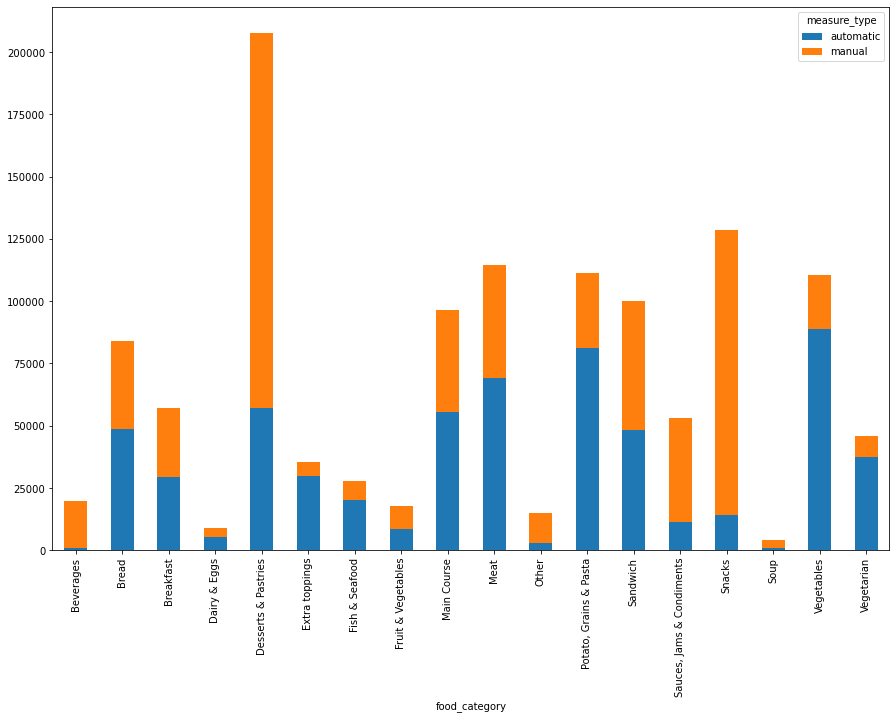

In [164]:
df_reason = df.groupby(['food_category', 'measure_type'])['waste'].sum().unstack()
df_reason.plot(kind='bar', stacked=True, rot=0)
plt.xticks(rotation=90)

- porcentage de manual por food type a traves del tiempo

In [85]:
df_weekly = df.set_index("date").groupby("food_category").resample('W').sum()
df_weekly_auto = df[df.measure_type == "automatic"].set_index("date").groupby("food_category").resample('W').sum()
df_weekly_manual = df[df.measure_type == "manual"].set_index("date").groupby("food_category").resample('W').sum()

df_weekly["ratio_measure_type"] = df_weekly_manual["waste"]/ (df_weekly_auto["waste"] + df_weekly_manual["waste"])

df_weekly = df_weekly.reset_index(level='food_category').rename(columns={'food_category': 'food_category'}).fillna(0)



In [86]:
df_weekly

,food_category,item,waste,ratio_measure_type
date,,,,
2021-02-28,Beverages,378.0,20.867323,0.000000
2021-03-07,Beverages,2191.0,51.257730,1.000000
2021-03-14,Beverages,0.0,0.000000,0.000000
2021-03-21,Beverages,1566.0,44.238582,0.507665
2021-03-28,Beverages,3254.0,149.464246,1.000000
...,...,...,...,...
2022-12-04,Vegetarian,2830.0,301.439258,0.106151
2022-12-11,Vegetarian,1903.0,268.538016,0.155214
2022-12-18,Vegetarian,4857.0,433.345308,0.010193


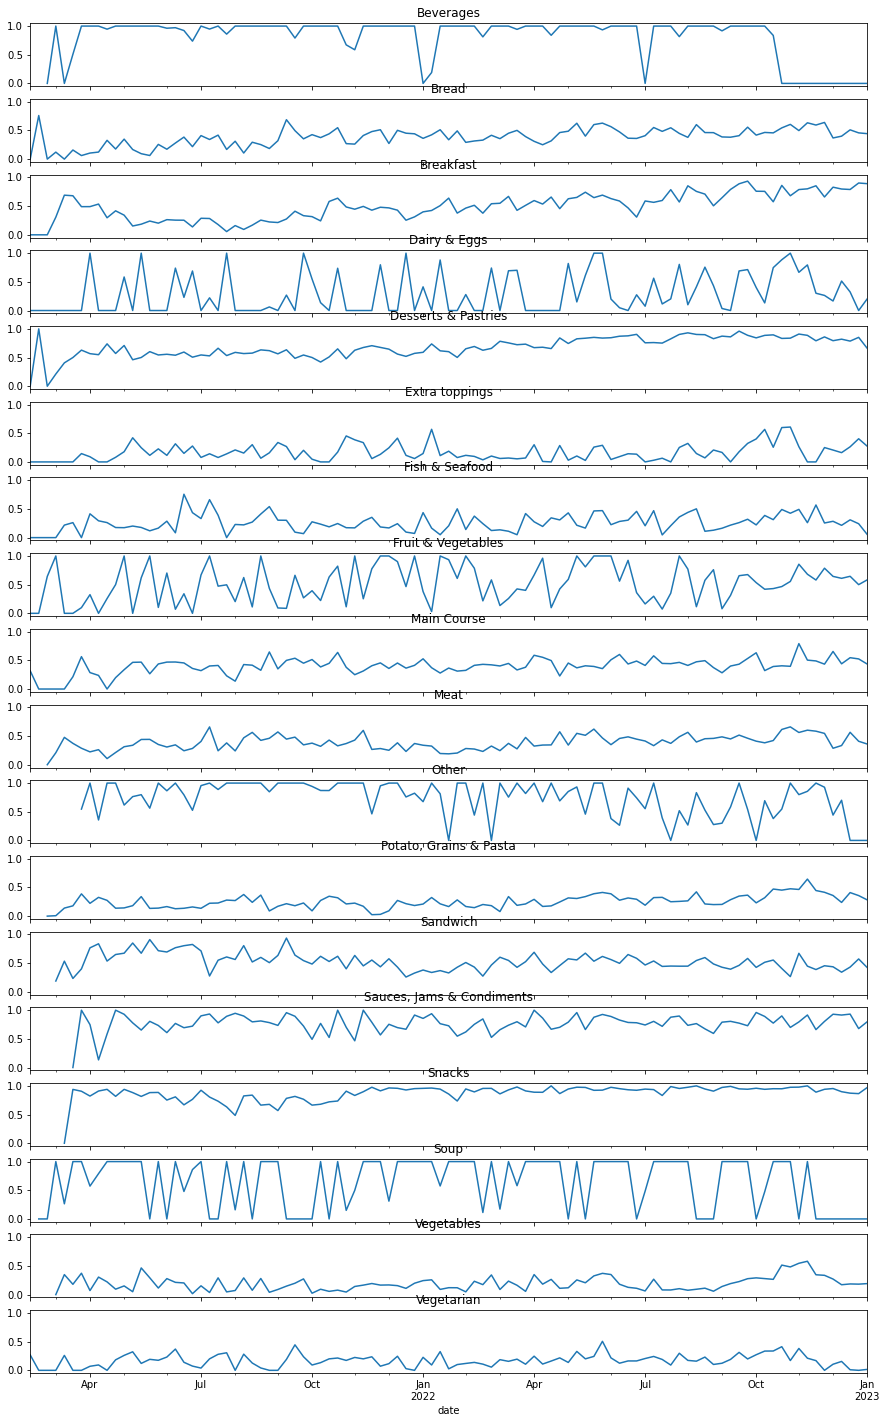

In [87]:
multiplot_col(df_weekly, "food_category", "ratio_measure_type")

In [88]:
df_mad_b_meat_auto = df[(df.food_category == "Desserts & Pastries") & (df.location == "Madrid") & (df.kitchen_type == "B") & (df.measure_type == "automatic")]
df_mad_b_meat_manual = df[(df.food_category == "Desserts & Pastries") & (df.location == "Madrid") & (df.kitchen_type == "B") & (df.measure_type == "manual")]

df_mad_b_meat_auto

,item,food_category,reason,location,kitchen_type,article_or_ingredient,measure_type,date,waste
19,161.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-10-14 21:00:00,20.356277
71,551.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Article,automatic,2022-04-28 21:00:00,33.665680
123,878.0,Desserts & Pastries,Sampling,Madrid,B,Article,automatic,2022-01-16 18:00:00,15.949232
130,317.0,Desserts & Pastries,Handling & Cooking,Madrid,B,Ingredient,automatic,2022-10-21 09:00:00,11.548939
138,1141.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Article,automatic,2021-03-24 21:00:00,10.694765
...,...,...,...,...,...,...,...,...,...
53243,107.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-11-13 21:00:00,30.567597
53284,551.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Article,automatic,2021-12-23 21:00:00,15.309409
53290,157.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2021-09-14 21:00:00,16.564359
53300,783.0,Desserts & Pastries,Prepared-Edible Exc.,Madrid,B,Ingredient,automatic,2022-09-30 21:00:00,18.258642


In [89]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    
    IF.fit(model_data)
    
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
    score = IF.decision_function(model_data)
    
    return output, score

In [90]:
outliers_auto, scores_auto = run_isolation_forest(df_mad_b_meat_auto[["waste"]])
outliers_manual, scores_manual = run_isolation_forest(df_mad_b_meat_manual[["waste"]])

In [70]:
outliers[outliers == np.nan]

Series([], dtype: int64)

<AxesSubplot:>

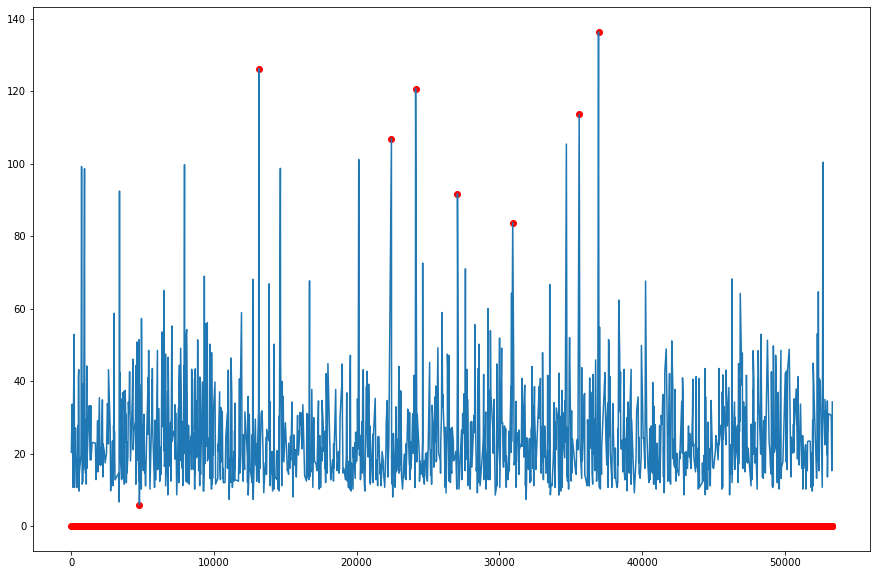

In [73]:
plt.scatter(df_mad_b_meat_auto.index, outliers_auto*df_mad_b_meat_auto.waste.values, color='r')
df_mad_b_meat_auto.waste.plot()

<AxesSubplot:>

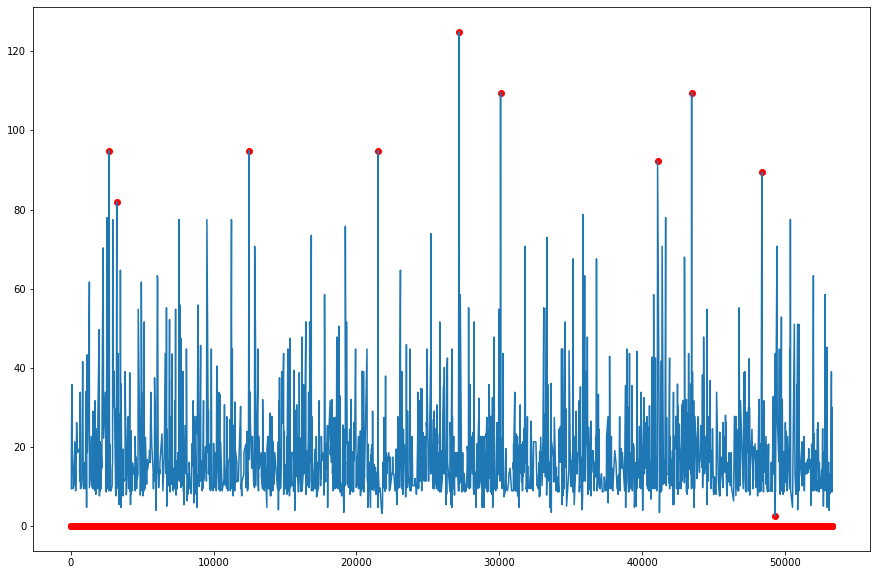

In [74]:
plt.scatter(df_mad_b_meat_manual.index, outliers_manual*df_mad_b_meat_manual.waste.values, color='r')
df_mad_b_meat_manual.waste.plot()

In [127]:
outliers_map = {}

for food_type in df.food_category.unique():
    df_mad_b_meat_auto = df[(df.food_category == food_type) & (df.location == "Madrid") & (df.kitchen_type == "B") & (df.measure_type == "automatic")]
    df_mad_b_meat_manual = df[(df.food_category == food_type) & (df.location == "Madrid") & (df.kitchen_type == "B") & (df.measure_type == "manual")]

    df_bcn_b_meat_auto = df[(df.food_category == food_type) & (df.location == "Barcelona") & (df.kitchen_type == "B") & (df.measure_type == "automatic")]
    df_bcn_b_meat_manual = df[(df.food_category == food_type) & (df.location == "Barcelona") & (df.kitchen_type == "B") & (df.measure_type == "manual")]

    try:
        outliers_auto_mad, scores_auto = run_isolation_forest(df_mad_b_meat_auto[["waste"]])
        outliers_manual_mad, scores_manual = run_isolation_forest(df_mad_b_meat_manual[["waste"]])
        outliers_auto_bcn, scores_manual = run_isolation_forest(df_bcn_b_meat_auto[["waste"]])
        outliers_manual_bcn, scores_manual = run_isolation_forest(df_bcn_b_meat_manual[["waste"]])
    except:
        continue
    outliers_map[food_type] = [outliers_auto_mad.values, outliers_manual_mad.values, outliers_auto_bcn.values, outliers_manual_bcn.values]

/Users/hectormejia/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning:

invalid value encountered in true_divide

/Users/hectormejia/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning:

invalid value encountered in true_divide

/Users/hectormejia/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning:

invalid value encountered in true_divide



In [128]:
food_types = [food_type for food_type in df.food_category.unique() if food_type in outliers_map]
food_types

['Extra toppings',
 'Meat',
 'Potato, Grains & Pasta',
 'Sandwich',
 'Fruit & Vegetables',
 'Main Course',
 'Desserts & Pastries',
 'Vegetarian',
 'Sauces, Jams & Condiments',
 'Vegetables',
 'Bread',
 'Soup',
 'Beverages',
 'Fish & Seafood',
 'Breakfast',
 'Dairy & Eggs']

In [135]:
anomalies_per_food_auto_mad = [sum(outliers_map[food_type][0]) for food_type in df.food_category.unique() if food_type in outliers_map]
anomalies_per_food_manual_mad = [sum(outliers_map[food_type][1]) for food_type in df.food_category.unique() if food_type in outliers_map]
anomalies_per_food_auto_bcn = [sum(outliers_map[food_type][2]) for food_type in df.food_category.unique() if food_type in outliers_map]
anomalies_per_food_manual_bcn = [sum(outliers_map[food_type][3]) for food_type in df.food_category.unique() if food_type in outliers_map]


In [163]:
anomalies_mad_auto_total = sum(anomalies_per_food_auto_mad)
anomalies_mad_manual_total = sum(anomalies_per_food_manual_mad)
anomalies_bcn_auto_total = sum(anomalies_per_food_auto_bcn)
anomalies_mad_manual_total = sum(anomalies_per_food_manual_bcn)

print(anomalies_mad_auto_total + anomalies_mad_manual_total, anomalies_bcn_auto_total + anomalies_mad_manual_total)

158 126


[]

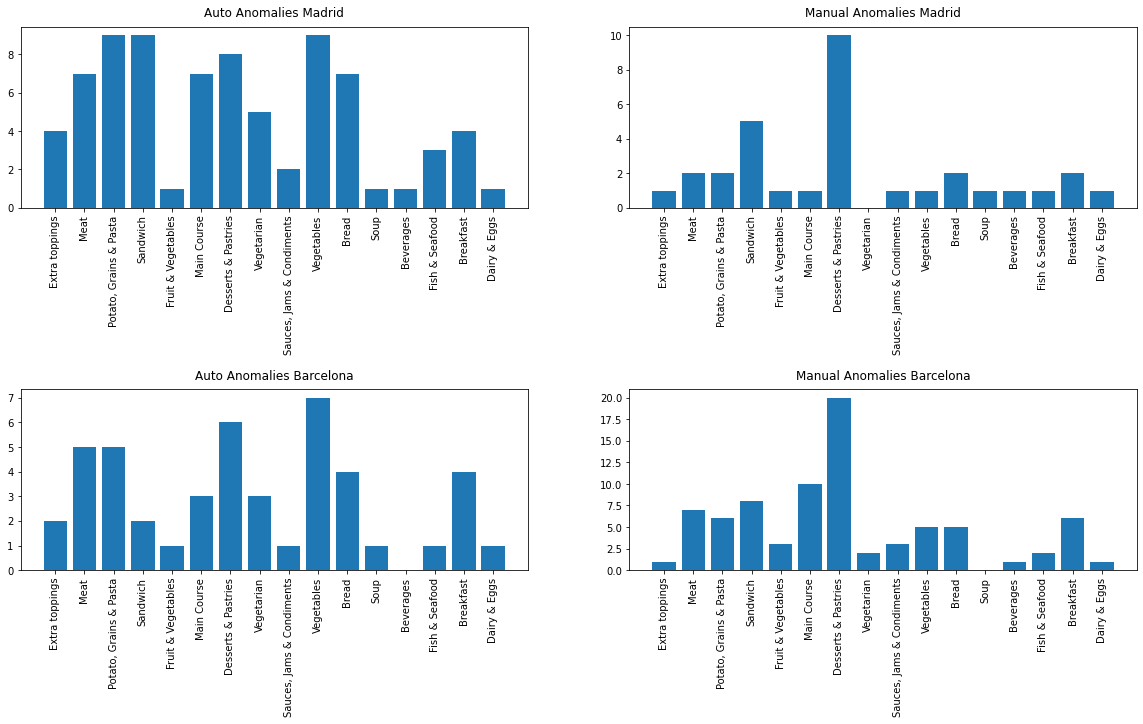

In [160]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0,0].bar(food_types, anomalies_per_food_auto_mad)
ax[0,1].bar(food_types, anomalies_per_food_manual_mad)
ax[1,0].bar(food_types, anomalies_per_food_auto_bcn)
ax[1,1].bar(food_types,anomalies_per_food_manual_bcn)

ax[0,0].set_title("Auto Anomalies Madrid", pad=10)
ax[0,1].set_title("Manual Anomalies Madrid", pad=10)
ax[1,0].set_title("Auto Anomalies Barcelona", pad=10)
ax[1,1].set_title("Manual Anomalies Barcelona", pad=10)

ax[0,0].tick_params('x', labelrotation=90)
ax[0,1].tick_params('x', labelrotation=90)
ax[1,0].tick_params('x', labelrotation=90)
ax[1,1].tick_params('x', labelrotation=90)
fig.subplots_adjust(hspace=1)

plt.plot()
